# One-Shot Learning for Modulation Format Identification in Evolving Optical Networks

File for the generation of plots after the training and testing of the one-shot Siamese CNN.

README file has instructions for recommended platform and libraries versions.

In [9]:
import time
import pickle
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times New Roman', 'Times']
rcParams['font.size'] = 16

## Loading definitions

In [10]:
folder = './dataset/' # workstation
model_path = './results/'

scenarios = []
scenarios.append('4QAM_OSNR45dB')
scenarios.append('4QAM_OSNR12dB')
scenarios.append('16QAM_OSNR45dB')
scenarios.append('16QAM_OSNR20dB')

scenarios.append('64QAM_OSNR45dB')
scenarios.append('64QAM_OSNR26dB')

scenarios.append('16C-QAM_OSNR45dB')
scenarios.append('16C-QAM_OSNR20dB')

scenarios.append('64C-QAM_OSNR45dB')
scenarios.append('64C-QAM_OSNR26dB')

points_per_symbol = 2000
seed = 100
np.random.seed(seed)

## Loading the results file

In [11]:
with open(model_path + 'results.h5', 'rb') as f:
    data = pickle.load(f)
    losses = data['losses']
    val_accs = data['val_accs']
    train_accs = data['train_accs']
    test_accs = data['test_accs']
    nn_accs = data['nn_accs']
    ways = data['ways']

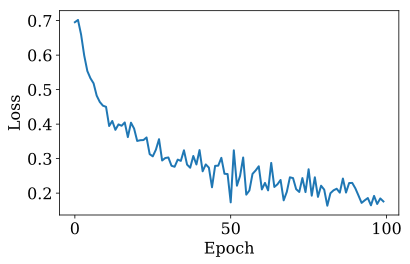

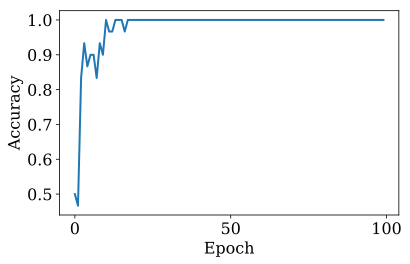

In [12]:
metric_labels = ['Loss', 'Accuracy', 'Accuracy validation']
for j, metric in enumerate(losses):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel(metric_labels[j])
    n_iter = len(losses[metric])
    plt.plot(losses[metric], linewidth=2.)
    plt.xticks([0, 50, 100])
    plt.tight_layout()
    plt.savefig(model_path + 'training-{}.pdf'.format(metric))

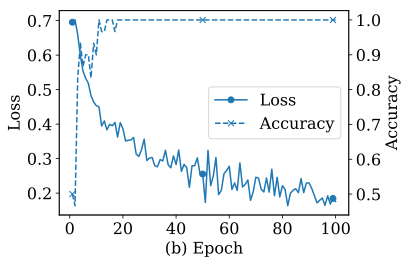

In [13]:
plt.figure()
plt.xlabel('(b) Epoch')
l1 = plt.plot(range(1, n_iter+1), losses['loss'], label='Loss', marker='o', markevery=49)
plt.ylabel('Loss')

ax2 = plt.twinx()
l2 = ax2.plot(range(1, n_iter+1), losses['acc'], label='Accuracy', linestyle='--', marker='x', markevery=49)
ax2.set_ylabel('Accuracy')

ax2.legend(l1+l2, ['Loss', 'Accuracy'], loc='center right')
plt.tight_layout()
plt.savefig(model_path + 'training-summary.pdf')
plt.show()
plt.close()

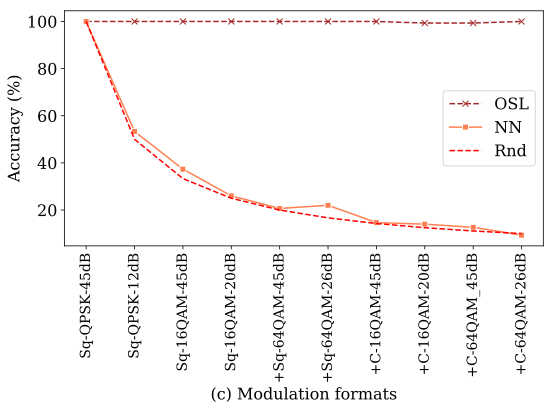

In [14]:
plt.figure(figsize=(8, 6))
# ax = sns.lineplot(ways, train_accs, label="SN (train)", marker='o')

plt.plot(ways, test_accs, label="OSL", marker='x', color='brown', markeredgecolor='brown', linestyle='--')
plt.plot(ways, nn_accs, label="NN", marker='s', markeredgecolor='white', color='coral')

plt.plot(ways, 100.0/ways, label="Rnd", color='red', ls='--')

plt.xlabel("(c) Modulation formats")
plt.ylabel("Accuracy (%)")
plt.xticks(ways, ['Sq-QPSK-45dB', 'Sq-QPSK-12dB', 'Sq-16QAM-45dB', 'Sq-16QAM-20dB', '+Sq-64QAM-45dB', '+Sq-64QAM-26dB', '+C-16QAM-45dB', '+C-16QAM-20dB', '+C-64QAM_45dB', '+C-64QAM-26dB'], rotation=90, fontsize=rcParams['font.size']-2.)
plt.legend(loc='center right')
plt.tight_layout()
plt.savefig(model_path + 'benchmark.pdf')
plt.show()

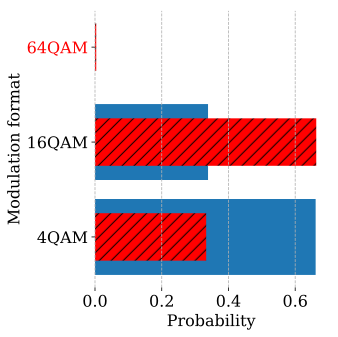

In [15]:
plt.figure(figsize=(5,5))
probability = np.random.rand(2)

probability = probability / sum(probability)

plt.barh(range(2), probability, height=.8)

probability = np.random.rand(3)
probability = probability / sum(probability)
plt.barh(range(3), probability, height=.5, color='red', hatch='//')

plt.xlabel('Probability')
plt.ylabel('Modulation format')
plt.yticks(range(3), ['4QAM', '16QAM', '64QAM'])
plt.grid(True, which='major', axis='x', linestyle='--')
plt.gca().get_yticklabels()[2].set_color('red')
# plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.box(False)
plt.tight_layout()
plt.savefig(model_path + 'figure-probability.pdf')
plt.show()
plt.close()

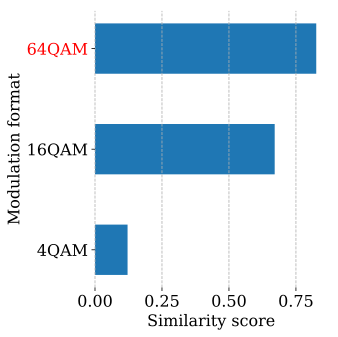

In [16]:
plt.figure(figsize=(5,5))

probability = np.random.rand(3)
plt.barh(range(3), probability, height=.5)

plt.xlabel('Similarity score')
plt.ylabel('Modulation format')
plt.yticks(range(3), ['4QAM', '16QAM', '64QAM'])
plt.grid(True, which='major', axis='x', linestyle='--')
plt.gca().get_yticklabels()[2].set_color('red')
plt.box(False)
plt.tight_layout()
plt.savefig(model_path + 'figure-probability-nonnormalized.pdf')
plt.show()
plt.close()